# K Nearest Neighbors Practice

In [235]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

wine data import

In [174]:
df_wine = pd.read_csv('wine.data', header=None) #각자 알맞은 wine.data 파일 경로 입력

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 직접 코드 짜보기

distance matrix 생성

In [175]:
def distance(train, test, metric='euclidean'):
    if metric=='euclidean':
        D = euclidean_distances(test.reshape(1, -1), train)
    elif metric=='manhattan':
        D = manhattan_distances(test.reshape(1, -1), train)
    return(D)

knn method

In [176]:
def KNN(data, test, n_neighbors = 3, metric='euclidean'):
    
    X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
    sc = StandardScaler()
    X_std = sc.fit_transform(X)
    
    if metric=='euclidean':
        D=distance(X_std, test, metric='euclidean')
    elif metric=='manhattan':
        D=distance(X_std, test, metric='manhattan')
        
    nearest_inds=np.array(sorted(list(enumerate(D[0])), key=lambda x :x[1])[0:n_neighbors])[:,0].astype(int)
    print(D[0][nearest_inds])
    print([nearest_inds])
    nearest_neighbors_labels = y[nearest_inds]
    print(nearest_neighbors_labels)
    unique, counts = np.unique(nearest_neighbors_labels, return_counts=True)
    test_label = sorted(list(zip(unique, counts)), key=lambda x : x[1], reverse=True)[0][0]
    return test_label

## sklearn knn 사용법 & 비교

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
kn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
sc = StandardScaler()
X_std = sc.fit_transform(X)
kn.fit(X_std, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [200]:
a = 1-2*np.random.rand(13)
print(KNN(df_wine, a))
print(kn.kneighbors(a.reshape(1,-1)))
print(kn.predict(a.reshape(1,-1)))

[2.50714698 2.63839056 2.65929201]
[array([ 43,  32, 117])]
[1 1 2]
1
(array([[2.50714698, 2.63839056, 2.65929201]]), array([[ 43,  32, 117]]))
[1]


In [201]:
kn2 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
kn2.fit(X_std, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [202]:
a = np.random.rand(13)
print(KNN(df_wine, a, n_neighbors=3, metric='manhattan'))
print(kn2.kneighbors(a.reshape(1,-1)))
print(kn2.predict(a.reshape(1,-1)))

[5.94593484 6.61072934 6.77651807]
[array([35, 57,  4])]
[1 1 1]
1
(array([[5.94593484, 6.61072934, 6.77651807]]), array([[35, 57,  4]]))
[1]


## k 값에 따른 정확도 변화

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=None)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [259]:
scores = np.zeros(10)
for i in range(10):
    kn3 = KNeighborsClassifier(n_neighbors=i+1, metric='euclidean')
    kn3.fit(X_train_std, y_train)
    scores[i]=kn3.score(X_test_std, y_test)

In [260]:
scores

array([0.94444444, 0.94444444, 0.98148148, 0.96296296, 0.96296296,
       0.96296296, 0.98148148, 0.92592593, 0.92592593, 0.94444444])

<function matplotlib.pyplot.show(*args, **kw)>

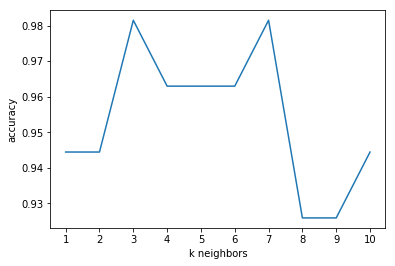

In [261]:
plt.figure
plt.xticks(np.arange(1, 11, 1))
plt.xlabel("k neighbors")
plt.ylabel("accuracy")
plt.plot(np.arange(1,11), scores)
plt.show